In [1]:
import getpass
import pymysql
from sqlalchemy import create_engine
import os

In [2]:
Hostname='localhost'
username='root'
password=getpass.getpass()

········


In [3]:
eng=create_engine(f'mysql+pymysql://{username}:{password}@{Hostname}:3306/barcelona')

In [4]:
import pandas as pd
from sqlalchemy import inspect

In [5]:
os.chdir('C:/Users/l1989/Desktop/DA/Weekly Projects/Barcelona 2017')

In [6]:
os.listdir()

['accidents_2017.csv',
 'air_quality_Nov2017.csv',
 'air_stations_Nov2017.csv',
 'Barcelona.sql',
 'births.csv',
 'bus_stops.csv',
 'deaths.csv',
 'immigrants_by_nationality.csv',
 'immigrants_emigrants_by_age.csv',
 'immigrants_emigrants_by_destination.csv',
 'immigrants_emigrants_by_destination2.csv',
 'immigrants_emigrants_by_sex.csv',
 'life_expectancy.csv',
 'most_frequent_baby_names.csv',
 'most_frequent_names.csv',
 'population.csv',
 'transports.csv',
 'unemployment.csv']

In [7]:
accidents=pd.read_csv('accidents_2017.csv')

In [8]:
accidents.to_sql('accidents',eng, if_exists='replace', index=False)

In [9]:
birth=pd.read_csv('births.csv')

In [10]:
birth.to_sql('birth',eng, if_exists='replace', index=False)

In [11]:
life_expectancy=pd.read_csv('life_expectancy.csv')

In [12]:
life_expectancy.to_sql('life_expectancy',eng, if_exists='replace', index=False)

* Step 1: Created database with 4 tables from Python to SQL
* Step 2: Import SQL back to Python for more detailed EDA

In [13]:
birth=pd.read_csv('births.csv')

In [14]:
birth.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
0,2017,1,Ciutat Vella,1,el Raval,Boys,283
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Boys,56
2,2017,1,Ciutat Vella,3,la Barceloneta,Boys,51
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Boys,90
4,2017,2,Eixample,5,el Fort Pienc,Boys,117


In [16]:
birth['District Name'].unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí', 'No consta'], dtype=object)

In [17]:
import numpy as np

* Non consta replaced by np.nan

In [18]:
birth['District Name']=birth['District Name'].apply(lambda x:np.nan if x=='No consta' else x )

In [19]:
birth['District Name'].unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí', nan], dtype=object)

* Clean the data in Gender

In [20]:
birth['Gender']=birth.Gender.replace({'Boys':'Male','Girls':'Female'})

In [21]:
birth

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,283
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,56
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,51
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,90
4,2017,2,Eixample,5,el Fort Pienc,Male,117
...,...,...,...,...,...,...,...
729,2013,10,Sant Martí,70,el Besòs i el Maresme,Female,93
730,2013,10,Sant Martí,71,Provençals del Poblenou,Female,95
731,2013,10,Sant Martí,72,Sant Martí de Provençals,Female,97
732,2013,10,Sant Martí,73,la Verneda i la Pau,Female,94


In [22]:
t1=birth.groupby(['Neighborhood Name','Gender']).Number.sum().to_frame().reset_index()

In [23]:
life_expectancy=pd.read_csv('life_expectancy.csv')

In [24]:
life_expectancy

,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender
0,el Raval,87.5,84.9,84.7,84.9,85.3,Female
1,el Barri Gòtic,88.0,84.3,84.4,87.5,84.4,Female
2,la Barceloneta,88.2,85.3,84.4,86.3,84.7,Female
3,"Sant Pere, Santa Caterina i la Ribera",88.9,85.9,86.1,85.5,85.3,Female
4,el Fort Pienc,89.7,87.1,87.2,87.7,86.7,Female
...,...,...,...,...,...,...,...
141,Diagonal Mar i el Front Marítim del Poblenou,82.1,80.9,81.2,79.7,82.2,Male
142,el Besòs i el Maresme,80.2,78.1,78.4,79.8,79.6,Male
143,Provençals del Poblenou,80.4,78.8,79.4,80.1,81.5,Male
144,Sant Martí de Provençals,81.9,79.5,79.7,80.5,80.2,Male


In [25]:
life_expectancy['Average']=life_expectancy[['2006-2010','2007-2011','2008-2012','2009-2013','2010-2014']].mean(axis=1)

In [26]:
life_expectancy.Neighborhood.nunique()

73

In [27]:
t2=life_expectancy[['Neighborhood','Gender','Average']]

In [28]:
t1.merge(t2,left_on='Neighborhood Name',right_on='Neighborhood',how='outer')

,Neighborhood Name,Gender_x,Number,Neighborhood,Gender_y,Average
0,Baró de Viver,Female,67.0,Baró de Viver,Female,84.000
1,Baró de Viver,Female,67.0,Baró de Viver,Male,75.325
2,Baró de Viver,Male,52.0,Baró de Viver,Female,84.000
3,Baró de Viver,Male,52.0,Baró de Viver,Male,75.325
4,Can Baró,Female,189.0,Can Baró,Female,86.500
...,...,...,...,...,...,...
291,les Tres Torres,Male,365.0,les Tres Torres,Male,82.560
292,NaN,NaN,NaN,la Marina del Prat Vermell - Zona Franca,Female,NaN
293,NaN,NaN,NaN,la Marina del Prat Vermell - Zona Franca,Male,NaN
294,NaN,NaN,NaN,la Verneda i la Pau,Female,86.900


In [29]:
joined=t1.merge(t2,left_on=['Neighborhood Name','Gender'],right_on=['Neighborhood','Gender'],how='inner')[['Neighborhood','Gender','Number','Average']]

In [30]:
joined=joined.rename({'Number':'Birth_Num','Average':'Avg._LifeExpectancy'},axis=1)

In [31]:
joined

,Neighborhood,Gender,Birth_Num,Avg._LifeExpectancy
0,Baró de Viver,Female,67,84.000
1,Baró de Viver,Male,52,75.325
2,Can Baró,Female,189,86.500
3,Can Baró,Male,155,80.120
4,Can Peguera,Female,43,82.900
...,...,...,...,...
137,les Corts,Male,923,81.940
138,les Roquetes,Female,391,86.120
139,les Roquetes,Male,384,75.860
140,les Tres Torres,Female,345,87.640


In [32]:
t3=birth[['District Name','Neighborhood Name']]

In [33]:
t4=joined.merge(t3,left_on='Neighborhood',right_on='Neighborhood Name',how='right')

In [34]:
t4.drop(columns='Neighborhood',inplace=True)

In [35]:
t4.drop_duplicates()

,Gender,Birth_Num,Avg._LifeExpectancy,District Name,Neighborhood Name
0,Female,67.0,84.000,Sant Andreu,Baró de Viver
1,Male,52.0,75.325,Sant Andreu,Baró de Viver
20,Female,189.0,86.500,Horta-Guinardó,Can Baró
21,Male,155.0,80.120,Horta-Guinardó,Can Baró
40,Female,43.0,82.900,Nou Barris,Can Peguera
...,...,...,...,...,...
1397,Male,365.0,82.560,Sarrià-Sant Gervasi,les Tres Torres
1416,NaN,NaN,NaN,Sants-Montjuïc,el Poble Sec
1418,NaN,NaN,NaN,Sants-Montjuïc,la Marina del Prat Vermell
1428,NaN,NaN,NaN,Sant Martí,la Verneda i la Pau


In [36]:
t4.sort_values(by=['District Name'],ascending=True)

,Gender,Birth_Num,Avg._LifeExpectancy,District Name,Neighborhood Name
896,Female,1060.0,85.46,Ciutat Vella,el Raval
612,Female,256.0,85.72,Ciutat Vella,el Barri Gòtic
613,Male,242.0,79.40,Ciutat Vella,el Barri Gòtic
614,Female,256.0,85.72,Ciutat Vella,el Barri Gòtic
615,Male,242.0,79.40,Ciutat Vella,el Barri Gòtic
...,...,...,...,...,...
881,Male,679.0,82.08,Sarrià-Sant Gervasi,el Putxet i el Farró
1438,NaN,NaN,NaN,NaN,No consta
1439,NaN,NaN,NaN,NaN,No consta
1440,NaN,NaN,NaN,NaN,No consta


In [37]:
Max_neig=t4[['District Name','Birth_Num']].groupby(['District Name']).max()

In [38]:
Max_neig

,Birth_Num
District Name,
Ciutat Vella,1175.0
Eixample,1093.0
Gràcia,1196.0
Horta-Guinardó,807.0
Les Corts,923.0
Nou Barris,552.0
Sant Andreu,1244.0
Sant Martí,884.0
Sants-Montjuïc,903.0


In [39]:
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt

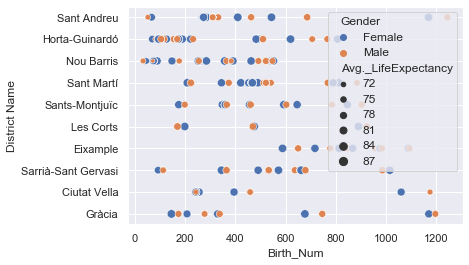

In [40]:
sns.set()

sns.scatterplot(data=t4,x='Birth_Num',y='District Name',hue='Gender',size='Avg._LifeExpectancy')

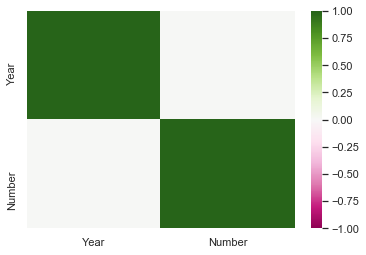

In [41]:
sns.heatmap(birth[['Year','Number']].corr(),vmin=-1,cmap='PiYG')

In [42]:
birth.Year.unique()

array([2017, 2016, 2015, 2014, 2013], dtype=int64)

In [43]:
accidents=pd.read_csv('accidents_2017.csv')
accidents.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [44]:
accidents['Total_injuries']=accidents['Mild injuries']+accidents['Serious injuries']

In [45]:
accidents

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Total_injuries
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,2
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,2
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,5
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,1
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392004,1
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443445,1
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894,1
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824,1


In [46]:
accidents_by_time=accidents.groupby(['Part of the day','Month'])['Total_injuries'].sum().reset_index()

In [47]:
accidents_by_time

,Part of the day,Month,Total_injuries
0,Afternoon,April,463
1,Afternoon,August,410
2,Afternoon,December,459
3,Afternoon,February,498
4,Afternoon,January,461
5,Afternoon,July,533
6,Afternoon,June,568
7,Afternoon,March,545
8,Afternoon,May,495
9,Afternoon,November,653


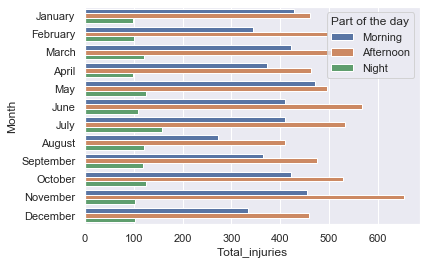

In [48]:
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Day_time=['Morning','Afternoon','Night']
sns.barplot(data=accidents_by_time, y='Month', x="Total_injuries", hue="Part of the day", order=Months, hue_order=Day_time)

In [49]:
accidents[['Longitude','Latitude']].replace(np.nan,0,inplace=True)

C:\Users\l1989\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [50]:
Location_Accidents['Latitude'].value_counts()

NameError: name 'Location_Accidents' is not defined

In [51]:
!pip install wheel
!pip install pipwin
!pipwin install shapely
!pipwin install gdal
!pipwin install fiona
!pipwin install pyproj
!pipwin install six
!pipwin install rtree
!pipwin install geopandas

Package `shapely` found in cache
https://download.lfd.uci.edu/pythonlibs/z4tqcw5k/Shapely-1.7.1-cp37-cp37m-win_amd64.whl
Shapely-1.7.1-cp37-cp37m-win_amd64.whl
[*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 586 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 8 kB / 586 kB @ 8 kB/s [------------------] [1.4%, 0s left]   [*] 8 kB / 586 kB @ 7 kB/s [------------------] [1.4%, 0s left]   [*] 24 kB / 586 kB @ 20 kB/s [------------------] [4.1%, 0s 

Package `fiona` found in cache
https://download.lfd.uci.edu/pythonlibs/z4tqcw5k/Fiona-1.8.18-cp37-cp37m-win_amd64.whl
Fiona-1.8.18-cp37-cp37m-win_amd64.whl
[*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 0 bytes / 522 kB @ 0 bytes/s [------------------] [0.0%, 0s left]   [*] 8 kB / 522 kB @ 8 kB/s [------------------] [1.5%, 0s left]   [*] 8 kB / 522 kB @ 7 kB/s [------------------] [1.5%, 0s left]   [*] 8 kB / 522 kB @ 7 kB/s [------------------] [1.5%, 0s left] 

Package `six` found in cache
https://download.lfd.uci.edu/pythonlibs/z4tqcw5k/six-1.15.0-py3-none-any.whl
six-1.15.0-py3-none-any.whl
[*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  [*] 0 bytes / 11 kB @ 0 bytes/s [------------------] [0.0%, 0s left]  Requirement already satisfied: six==1.15.0 from file:///C:/Users/l1989/pipwin/six-1.15.0-py3-none-any.whl in c:\users\l1989\anaconda3\lib\site-packages (1.15.0)
[*] 11 kB / 11 kB @ 0 bytes/s [##################] [100%, 0s left]    
Pack

In [52]:
import geopandas as gpd
from shapely.geometry import Point

In [53]:
Location_Accidents = geopandas.GeoDataFrame(
    accidents, geometry=geopandas.points_from_xy(accidents.Longitude, accidents.Latitude))

NameError: name 'geopandas' is not defined

In [ ]:
Location_Accidents

In [ ]:
!pip install descartes

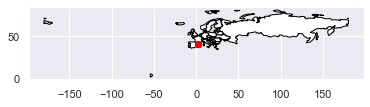

In [152]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
Location_Accidents.plot(ax=ax, color='red')


plt.show()

In [ ]:
# import street map
street_map = gpd.read_file(‘/content/geo_export_1f88d1b8–51fd-42aa-84b0–22d7bad6bc6f.shp’)
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
Location_Accidents.plot(column='Total_injuries',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Accident in Barcelona',fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
# show map
plt.show()

# https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391